In [ ]:
#load the necessary libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Final_dataset.xlsx to Final_dataset.xlsx


In [ ]:
df = pd.read_excel("Final_dataset.xlsx")  # use the exact file name shown after upload
df.head()

,S.No,Statement,Status
0,1,విద్యార్థి పరిమాణం నేను 30 సంవత్సరాల వయస్సు గల...,ఆందోళన
1,2,నా ఒత్తిడిని తట్టుకునే శక్తి ఇప్పటికే సున్నాకి...,ఒత్తిడి
2,3,"నేను ఫ్రీలాన్సర్‌ని, అంటే చెల్లింపు ఎల్లప్పుడూ...",ఒత్తిడి
3,4,ప్రతి రోజూ స్కూల్‌లో నా rd పీరియడ్‌కి చాలా నెర...,డిప్రెషన్
4,5,నేను 70-80 సంవత్సరాల వరకు జీవించాలనుకుంటున్నాన...,ఆత్మహత్య


In [ ]:
# Check the shape of the data:
df.shape

(8400, 3)

In [ ]:
df.head()

,S.No,Statement,Status
0,1,విద్యార్థి పరిమాణం నేను 30 సంవత్సరాల వయస్సు గల...,ఆందోళన
1,2,నా ఒత్తిడిని తట్టుకునే శక్తి ఇప్పటికే సున్నాకి...,ఒత్తిడి
2,3,"నేను ఫ్రీలాన్సర్‌ని, అంటే చెల్లింపు ఎల్లప్పుడూ...",ఒత్తిడి
3,4,ప్రతి రోజూ స్కూల్‌లో నా rd పీరియడ్‌కి చాలా నెర...,డిప్రెషన్
4,5,నేను 70-80 సంవత్సరాల వరకు జీవించాలనుకుంటున్నాన...,ఆత్మహత్య


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   S.No       8400 non-null   int64 
 1   Statement  8400 non-null   object
 2   Status     8400 non-null   object
dtypes: int64(1), object(2)
memory usage: 197.0+ KB


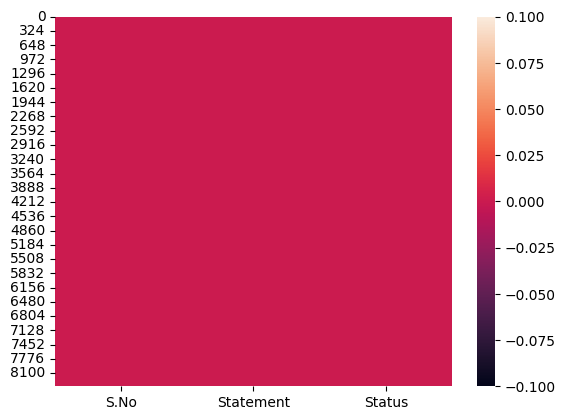

In [ ]:
# Visualize missing data using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull())
plt.show()

In [ ]:
df.describe()

,S.No
count,8400.000000
mean,4200.500000
std,2425.015464
min,1.000000
25%,2100.750000
50%,4200.500000
75%,6300.250000
max,8400.000000


In [ ]:
df['Status'].unique()

array(['ఆందోళన', 'ఒత్తిడి', 'డిప్రెషన్', 'ఆత్మహత్య', 'సాధారణ',
       'వ్యక్తిత్వ క్రమరాహిత్యం', 'బైపోలార్'], dtype=object)

In [ ]:
df['Status'].value_counts()

,count
Status,
ఆందోళన,1200
ఒత్తిడి,1200
డిప్రెషన్,1200
ఆత్మహత్య,1200
సాధారణ,1200
వ్యక్తిత్వ క్రమరాహిత్యం,1200
బైపోలార్,1200


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NotoSansTelugu-VariableFont_wdth,wght.ttf to NotoSansTelugu-VariableFont_wdth,wght.ttf


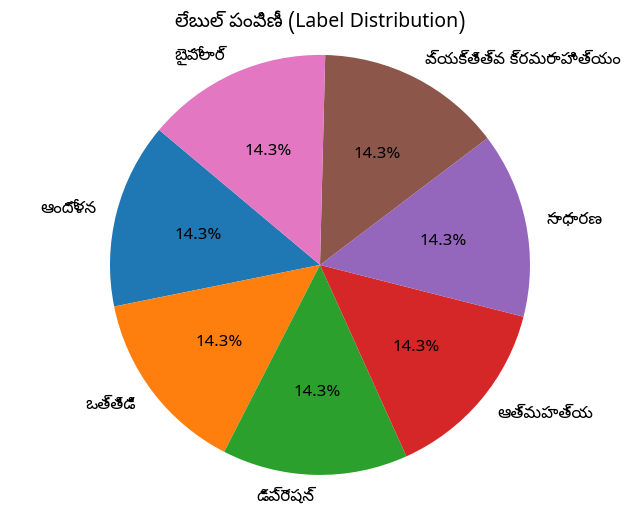

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Load the uploaded Telugu font
font_path = "NotoSansTelugu-VariableFont_wdth,wght.ttf"  # must match uploaded file name
prop = fm.FontProperties(fname=font_path)

# Count label frequencies
label_counts = df['Status'].value_counts()

# Plot pie chart with Telugu labels
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140,
        textprops={'fontproperties': prop, 'fontsize': 12})
plt.title('లేబుల్ పంపిణీ (Label Distribution)', fontproperties=prop, fontsize=14)
plt.axis('equal')
plt.show()


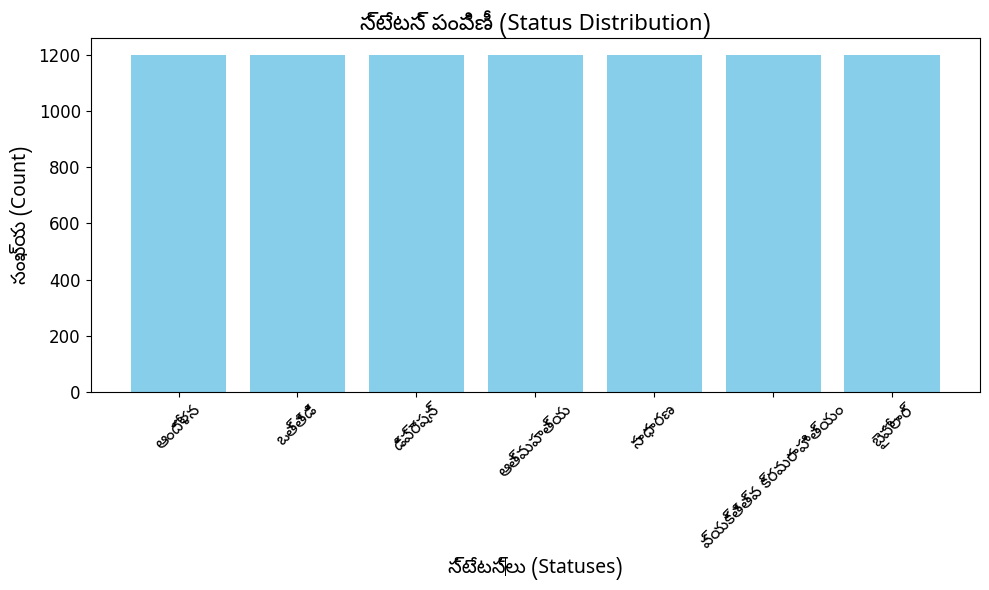

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ✅ Load the uploaded Telugu font
telugu_font_path = "NotoSansTelugu-VariableFont_wdth,wght.ttf"
prop = fm.FontProperties(fname=telugu_font_path)

# ✅ Count label frequencies
status_counts = df['Status'].value_counts()

# ✅ Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(status_counts.index, status_counts.values, color='skyblue')

# ✅ Add Telugu labels with custom font
plt.xlabel('స్టేటస్‌లు (Statuses)', fontproperties=prop, fontsize=14)
plt.ylabel('సంఖ్య (Count)', fontproperties=prop, fontsize=14)
plt.title('స్టేటస్ పంపిణీ (Status Distribution)', fontproperties=prop, fontsize=16)

# ✅ Set tick fonts
plt.xticks(rotation=45, fontproperties=prop, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from torch.optim import AdamW
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["Status"])
# Print the label mapping
for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {code}")

# Get texts and labels
texts = df["Statement"].tolist()   # corrected column name
labels = df["label"].tolist()

ఆందోళన: 0
ఆత్మహత్య: 1
ఒత్తిడి: 2
డిప్రెషన్: 3
బైపోలార్: 4
వ్యక్తిత్వ క్రమరాహిత్యం: 5
సాధారణ: 6


In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Split into train and temp (train = 70%, temp = 30%)
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    df["Statement"].tolist(),
    df["label"].tolist(),
    test_size=0.3,
    stratify=df["label"],
    random_state=42
)

# Step 2: Split temp into validation and test (each = 15%)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts,
    temp_labels,
    test_size=0.5,
    stratify=temp_labels,
    random_state=42
)


In [ ]:
print("Total:", len(df))
print("Train size:", len(train_texts))
print("Validation size:", len(val_texts))
print("Test size:", len(test_texts))


Total: 8400
Train size: 5880
Validation size: 1260
Test size: 1260


In [ ]:
from transformers import AutoTokenizer

model_name = "ai4bharat/IndicBERTv2-MLM-only"
tokenizer = AutoTokenizer.from_pretrained(model_name)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.75M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
from torch.utils.data import Dataset
import torch

class TeluguDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=128)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = TeluguDataset(train_texts, train_labels)
val_dataset = TeluguDataset(val_texts, val_labels)
test_dataset = TeluguDataset(test_texts, test_labels)


In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = len(label_encoder.classes_)

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


config.json:   0%|          | 0.00/639 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/IndicBERTv2-MLM-only and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(250000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)


In [ ]:
from torch.optim import AdamW
from tqdm import tqdm

optimizer = AdamW(model.parameters(), lr=2e-5)

model.train()
for epoch in range(5):
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        optimizer.zero_grad()
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        loop.set_description(f"Epoch {epoch}")
        loop.set_postfix(loss=loss.item())


Epoch 4: 100%|██████████| 368/368 [02:31<00:00,  2.43it/s, loss=0.0868]


In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(250000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_validation_accuracy(model, dataloader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch["labels"].cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"\n✅ Validation Accuracy: {acc:.4f}")

# Call for validation set
evaluate_validation_accuracy(model, val_loader)



✅ Validation Accuracy: 0.7460


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)



✅ Test Accuracy: 0.7429

📊 Test Classification Report:
                         precision    recall  f1-score   support

                 ఆందోళన       0.85      0.79      0.82       180
               ఆత్మహత్య       0.60      0.63      0.62       180
                ఒత్తిడి       0.68      0.78      0.72       180
              డిప్రెషన్       0.53      0.58      0.56       180
               బైపోలార్       0.89      0.65      0.75       180
వ్యక్తిత్వ క్రమరాహిత్యం       0.83      0.89      0.86       180
                 సాధారణ       0.90      0.87      0.88       180

               accuracy                           0.74      1260
              macro avg       0.75      0.74      0.75      1260
           weighted avg       0.75      0.74      0.75      1260



/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3078 (\N{TELUGU LETTER AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Telugu natively.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3074 (\N{TELUGU SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3110 (\N{TELUGU LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3147 (\N{TELUGU VOWEL SIGN OO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3123 (\N{TELUGU LETTER LLA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-p

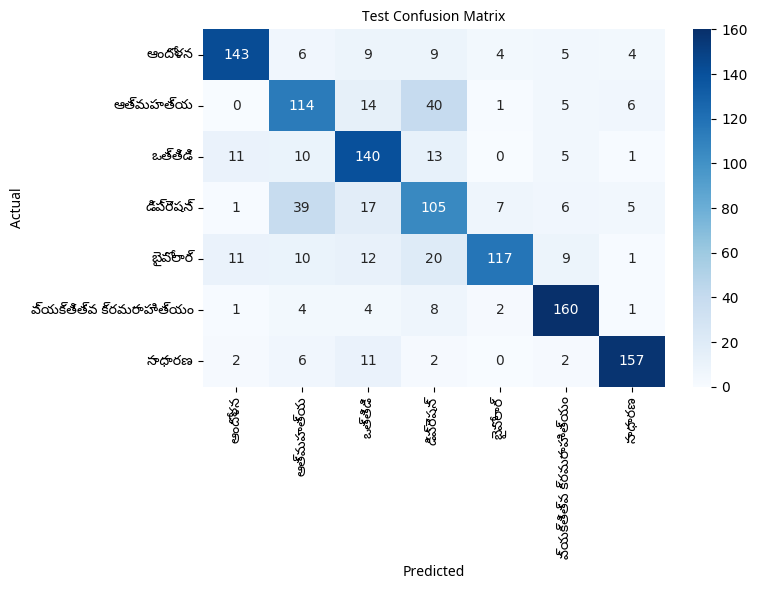

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Load the Telugu font
font_path = "NotoSansTelugu-VariableFont_wdth,wght.ttf"
prop = fm.FontProperties(fname=font_path)

def evaluate_test_results(name, model, dataloader, label_encoder):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch["labels"].cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"\n✅ {name} Accuracy: {acc:.4f}")

    print(f"\n📊 {name} Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                     xticklabels=label_encoder.classes_,
                     yticklabels=label_encoder.classes_)

    ax.set_title(f"{name} Confusion Matrix", fontproperties=prop)
    ax.set_xlabel("Predicted", fontproperties=prop)
    ax.set_ylabel("Actual", fontproperties=prop)
    ax.set_xticklabels(ax.get_xticklabels(), fontproperties=prop)
    ax.set_yticklabels(ax.get_yticklabels(), fontproperties=prop)

    plt.tight_layout()
    plt.show()

# Call for test set
evaluate_test_results("Test", model, test_loader, label_encoder)


In [ ]:
import pandas as pd

train_df = pd.DataFrame({
    "Statement": train_texts,
    "Label": label_encoder.inverse_transform(train_labels)
})
train_df.to_csv("train_data_labels.csv", index=False, encoding="utf-8-sig")


In [ ]:
val_df = pd.DataFrame({
    "Statement": val_texts,
    "Label": label_encoder.inverse_transform(val_labels)
})
val_df.to_csv("validation_data_labels.csv", index=False, encoding="utf-8-sig")


In [ ]:
def evaluate_test_results(name, model, dataloader, label_encoder):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch["labels"].cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"\n✅ {name} Accuracy: {acc:.4f}")

    print(f"\n📊 {name} Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                     xticklabels=label_encoder.classes_,
                     yticklabels=label_encoder.classes_)

    ax.set_title(f"{name} Confusion Matrix", fontproperties=prop)
    ax.set_xlabel("Predicted", fontproperties=prop)
    ax.set_ylabel("Actual", fontproperties=prop)
    ax.set_xticklabels(ax.get_xticklabels(), fontproperties=prop)
    ax.set_yticklabels(ax.get_yticklabels(), fontproperties=prop)
    plt.tight_layout()
    plt.show()

    return all_labels, all_preds


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)



✅ Test Accuracy: 0.7429

📊 Test Classification Report:
                         precision    recall  f1-score   support

                 ఆందోళన       0.85      0.79      0.82       180
               ఆత్మహత్య       0.60      0.63      0.62       180
                ఒత్తిడి       0.68      0.78      0.72       180
              డిప్రెషన్       0.53      0.58      0.56       180
               బైపోలార్       0.89      0.65      0.75       180
వ్యక్తిత్వ క్రమరాహిత్యం       0.83      0.89      0.86       180
                 సాధారణ       0.90      0.87      0.88       180

               accuracy                           0.74      1260
              macro avg       0.75      0.74      0.75      1260
           weighted avg       0.75      0.74      0.75      1260



/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3078 (\N{TELUGU LETTER AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Telugu natively.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3074 (\N{TELUGU SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3110 (\N{TELUGU LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3147 (\N{TELUGU VOWEL SIGN OO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3123 (\N{TELUGU LETTER LLA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-p

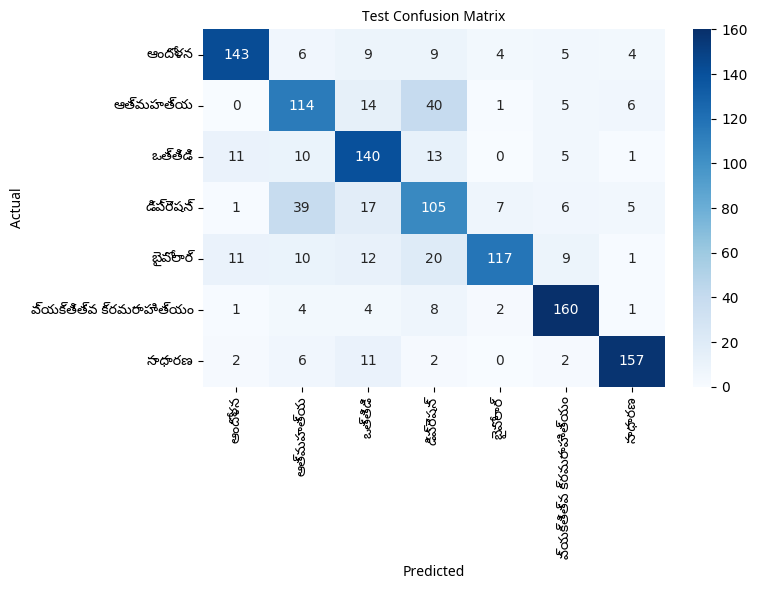

In [ ]:
test_labels_actual, test_preds = evaluate_test_results("Test", model, test_loader, label_encoder)

# Save actual vs predicted for test set
test_df = pd.DataFrame({
    "Statement": test_texts,
    "Actual_Label": label_encoder.inverse_transform(test_labels_actual),
    "Predicted_Label": label_encoder.inverse_transform(test_preds)
})
test_df.to_csv("test_actual_vs_predicted.csv", index=False, encoding="utf-8-sig")


In [ ]:
model_name = "google/muril-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

class TeluguDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_len)
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = TeluguDataset(train_texts, train_labels, tokenizer)
val_dataset = TeluguDataset(val_texts, val_labels, tokenizer)
test_dataset = TeluguDataset(test_texts, test_labels, tokenizer)


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(label_encoder.classes_))
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/muril-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.train()
for epoch in range(5):
    total_loss = 0
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}
        optimizer.zero_grad()
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        loop.set_description(f"Epoch {epoch}")
        loop.set_postfix(loss=loss.item())


Epoch 4: 100%|██████████| 368/368 [02:27<00:00,  2.50it/s, loss=0.694]


In [ ]:
def evaluate_validation_accuracy(model, dataloader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch["labels"].cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"\n✅ Validation Accuracy: {acc:.4f}")

evaluate_validation_accuracy(model, val_loader)



✅ Validation Accuracy: 0.6810


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)



✅ Test Accuracy: 0.6921

📊 Test Classification Report:
                         precision    recall  f1-score   support

                 ఆందోళన       0.77      0.79      0.78       180
               ఆత్మహత్య       0.55      0.61      0.58       180
                ఒత్తిడి       0.56      0.68      0.61       180
              డిప్రెషన్       0.52      0.36      0.42       180
               బైపోలార్       0.73      0.74      0.73       180
వ్యక్తిత్వ క్రమరాహిత్యం       0.88      0.78      0.83       180
                 సాధారణ       0.84      0.88      0.86       180

               accuracy                           0.69      1260
              macro avg       0.69      0.69      0.69      1260
           weighted avg       0.69      0.69      0.69      1260



/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3078 (\N{TELUGU LETTER AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Telugu natively.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3074 (\N{TELUGU SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3110 (\N{TELUGU LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3147 (\N{TELUGU VOWEL SIGN OO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3123 (\N{TELUGU LETTER LLA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-p

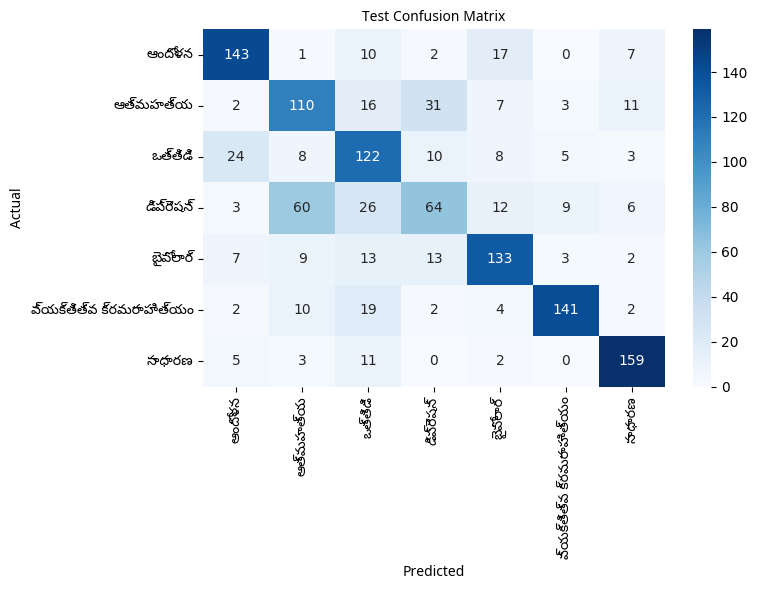

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# Load the Telugu font
font_path = "NotoSansTelugu-VariableFont_wdth,wght.ttf"
prop = fm.FontProperties(fname=font_path)

def evaluate_test_results(name, model, dataloader, label_encoder):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch["labels"].cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"\n✅ {name} Accuracy: {acc:.4f}")

    print(f"\n📊 {name} Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                     xticklabels=label_encoder.classes_,
                     yticklabels=label_encoder.classes_)

    ax.set_title(f"{name} Confusion Matrix", fontproperties=prop)
    ax.set_xlabel("Predicted", fontproperties=prop)
    ax.set_ylabel("Actual", fontproperties=prop)
    ax.set_xticklabels(ax.get_xticklabels(), fontproperties=prop)
    ax.set_yticklabels(ax.get_yticklabels(), fontproperties=prop)
    plt.tight_layout()
    plt.show()

    return all_labels, all_preds

test_labels_actual, test_preds = evaluate_test_results("Test", model, test_loader, label_encoder)


In [ ]:
# Create DataFrame to save actual vs predicted labels for test set
test_df = pd.DataFrame({
    "Statement": test_texts,
    "Actual_Label": label_encoder.inverse_transform(test_labels_actual),
    "Predicted_Label": label_encoder.inverse_transform(test_preds)
})

# Save to CSV (UTF-8 encoding for Telugu)
test_df.to_csv("muril_test_actual_vs_predicted.csv", index=False, encoding="utf-8-sig")

print("📁 Test predictions saved to 'muril_test_actual_vs_predicted.csv'")


📁 Test predictions saved to 'muril_test_actual_vs_predicted.csv'


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Load mBERT model and tokenizer
model_name = "bert-base-multilingual-cased"

tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=7)


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Example list of texts (replace with your actual train_texts, etc.)
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)



In [ ]:
class TeluguDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)




In [ ]:
train_dataset = TeluguDataset(train_encodings, train_labels)
val_dataset = TeluguDataset(val_encodings, val_labels)
test_dataset = TeluguDataset(test_encodings, test_labels)



In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [ ]:
from torch.optim import AdamW  # ✅ Use this instead

optimizer = AdamW(model.parameters(), lr=2e-5)



In [ ]:
from tqdm import tqdm

model.train()
for epoch in range(5):  # you can change the number of epochs
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        optimizer.zero_grad()
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item())


Epoch 5: 100%|██████████| 368/368 [02:19<00:00,  2.65it/s, loss=0.634]


In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_validation_accuracy(model, dataloader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch["labels"].cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"\n✅ Validation Accuracy: {acc:.4f}")

# Call the function
evaluate_validation_accuracy(model, val_loader)



✅ Validation Accuracy: 0.6841


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)



✅ Test Accuracy: 0.6635

📊 Classification Report:
                         precision    recall  f1-score   support

                 ఆందోళన       0.82      0.61      0.70       180
               ఆత్మహత్య       0.60      0.40      0.48       180
                ఒత్తిడి       0.59      0.70      0.64       180
              డిప్రెషన్       0.44      0.54      0.49       180
               బైపోలార్       0.70      0.72      0.71       180
వ్యక్తిత్వ క్రమరాహిత్యం       0.71      0.83      0.77       180
                 సాధారణ       0.85      0.85      0.85       180

               accuracy                           0.66      1260
              macro avg       0.67      0.66      0.66      1260
           weighted avg       0.67      0.66      0.66      1260



/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3078 (\N{TELUGU LETTER AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Telugu natively.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3074 (\N{TELUGU SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3110 (\N{TELUGU LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3147 (\N{TELUGU VOWEL SIGN OO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3123 (\N{TELUGU LETTER LLA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-p

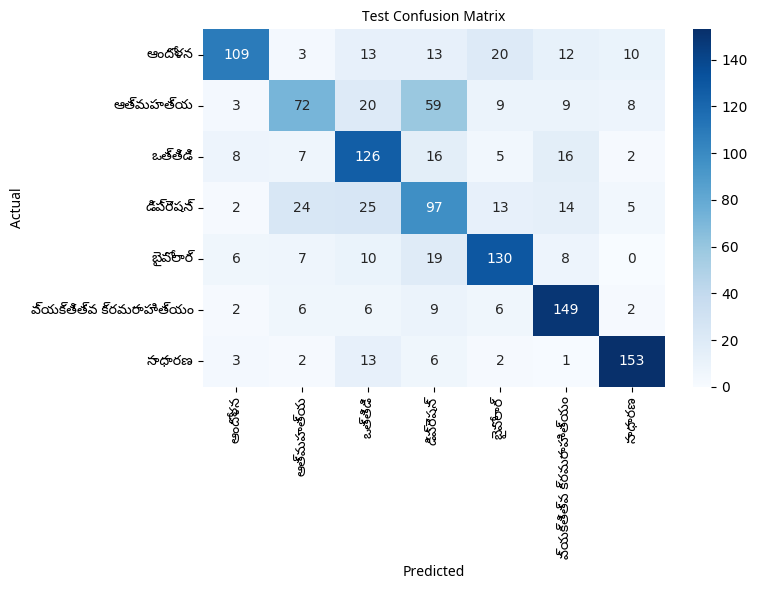

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Load Telugu font
font_path = "NotoSansTelugu-VariableFont_wdth,wght.ttf"
prop = fm.FontProperties(fname=font_path)

def evaluate_test_results(model, dataloader, label_encoder):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch["labels"].cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"\n✅ Test Accuracy: {acc:.4f}")
    print("\n📊 Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                     xticklabels=label_encoder.classes_,
                     yticklabels=label_encoder.classes_)

    ax.set_title("Test Confusion Matrix", fontproperties=prop)
    ax.set_xlabel("Predicted", fontproperties=prop)
    ax.set_ylabel("Actual", fontproperties=prop)
    ax.set_xticklabels(ax.get_xticklabels(), fontproperties=prop)
    ax.set_yticklabels(ax.get_yticklabels(), fontproperties=prop)

    plt.tight_layout()
    plt.show()

# Call the function
evaluate_test_results(model, test_loader, label_encoder)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Collect predictions and true labels
model.eval()
test_preds = []
test_labels_actual = []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        preds = torch.argmax(outputs.logits, dim=-1)
        test_preds.extend(preds.cpu().numpy())
        test_labels_actual.extend(batch["labels"].cpu().numpy())

# Create DataFrame with actual and predicted labels
mbbert_results_df = pd.DataFrame({
    "Statement": test_texts,
    "Actual_Label": label_encoder.inverse_transform(test_labels_actual),
    "Predicted_Label": label_encoder.inverse_transform(test_preds)
})

# Save to CSV
mbbert_results_df.to_csv("mbbert_test_predictions.csv", index=False, encoding="utf-8-sig")

print("✅ Saved mBERT predictions to 'mbbert_test_predictions.csv'")


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Saved mBERT predictions to 'mbbert_test_predictions.csv'


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=7)
model.to(device)


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)


In [ ]:
class TeluguDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

train_dataset = TeluguDataset(train_encodings, train_labels)
val_dataset = TeluguDataset(val_encodings, val_labels)
test_dataset = TeluguDataset(test_encodings, test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)


In [ ]:
optimizer = AdamW(model.parameters(), lr=2e-5)

epochs = 5
model.train()

for epoch in range(epochs):
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"\nEpoch {epoch+1} ✅ Average Loss: {total_loss / len(train_loader):.4f}")


Epoch 1: 100%|██████████| 368/368 [02:27<00:00,  2.49it/s]



Epoch 1 ✅ Average Loss: 1.5472


Epoch 2: 100%|██████████| 368/368 [02:29<00:00,  2.46it/s]



Epoch 2 ✅ Average Loss: 1.0072


Epoch 3: 100%|██████████| 368/368 [02:29<00:00,  2.46it/s]



Epoch 3 ✅ Average Loss: 0.7932


Epoch 4: 100%|██████████| 368/368 [02:29<00:00,  2.47it/s]



Epoch 4 ✅ Average Loss: 0.6368


Epoch 5: 100%|██████████| 368/368 [02:29<00:00,  2.47it/s]


Epoch 5 ✅ Average Loss: 0.5155


In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_validation_accuracy(model, dataloader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch["labels"].cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"\n✅ Validation Accuracy: {acc:.4f}")

# ✅ Call this for your current model and validation set
evaluate_validation_accuracy(model, val_loader)




✅ Validation Accuracy: 0.7198



✅ Test Accuracy: 0.7111

📊 Classification Report:
                         precision    recall  f1-score   support

                 ఆందోళన       0.84      0.73      0.78       180
               ఆత్మహత్య       0.57      0.55      0.56       180
                ఒత్తిడి       0.76      0.67      0.71       180
              డిప్రెషన్       0.47      0.59      0.52       180
               బైపోలార్       0.81      0.70      0.75       180
వ్యక్తిత్వ క్రమరాహిత్యం       0.76      0.86      0.81       180
                 సాధారణ       0.85      0.88      0.86       180

               accuracy                           0.71      1260
              macro avg       0.72      0.71      0.71      1260
           weighted avg       0.72      0.71      0.71      1260



/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3078 (\N{TELUGU LETTER AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Telugu natively.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3074 (\N{TELUGU SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3110 (\N{TELUGU LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3147 (\N{TELUGU VOWEL SIGN OO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3123 (\N{TELUGU LETTER LLA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-p

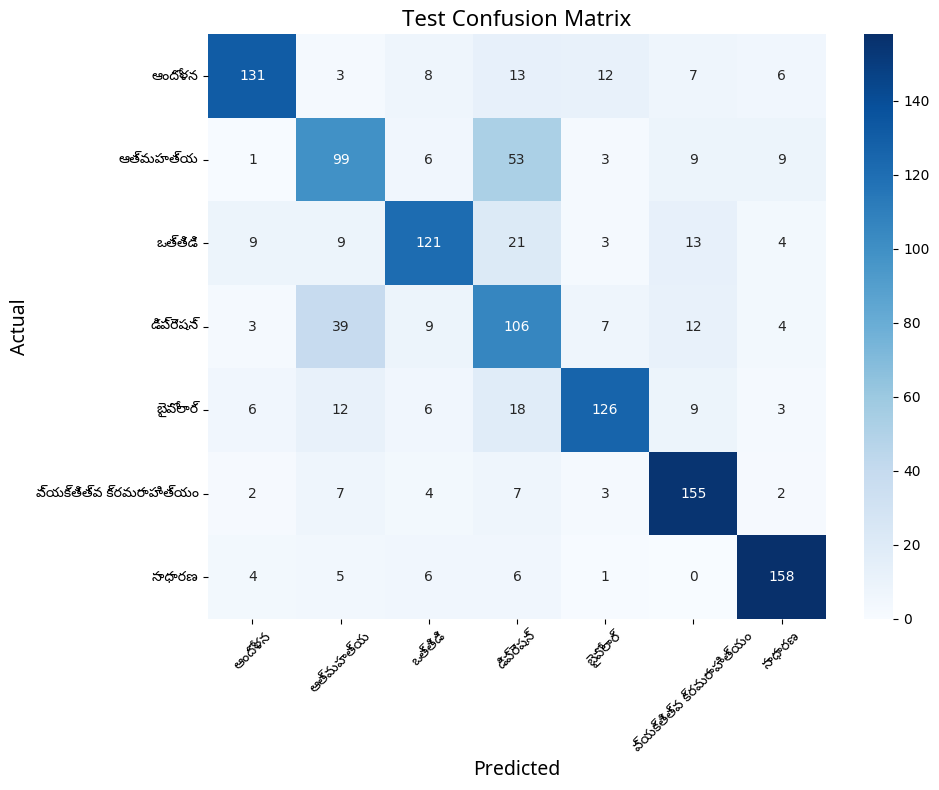

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Load Telugu font
font_path = "NotoSansTelugu-VariableFont_wdth,wght.ttf"  # Ensure this file is uploaded to your Colab
prop = fm.FontProperties(fname=font_path)

def evaluate_test_results(model, dataloader, label_encoder):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch["labels"].cpu().numpy())

    # ✅ Accuracy
    acc = accuracy_score(all_labels, all_preds)
    print(f"\n✅ Test Accuracy: {acc:.4f}")

    # 📊 Classification Report
    print("\n📊 Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

    # 📉 Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                     xticklabels=label_encoder.classes_,
                     yticklabels=label_encoder.classes_)

    ax.set_title("Test Confusion Matrix", fontproperties=prop, fontsize=16)
    ax.set_xlabel("Predicted", fontproperties=prop, fontsize=14)
    ax.set_ylabel("Actual", fontproperties=prop, fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), fontproperties=prop, rotation=45)
    ax.set_yticklabels(ax.get_yticklabels(), fontproperties=prop, rotation=0)

    plt.tight_layout()
    plt.show()

# 🔁 Call for XLM-RoBERTa
evaluate_test_results(model, test_loader, label_encoder)


In [ ]:
import pandas as pd

# Ensure your test_texts contains the original Telugu sentences
# Ensure test_loader and label_encoder are already defined

model.eval()
test_preds = []
test_labels_actual = []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        preds = torch.argmax(outputs.logits, dim=-1)
        test_preds.extend(preds.cpu().numpy())
        test_labels_actual.extend(batch["labels"].cpu().numpy())

# ✅ Create DataFrame
results_df = pd.DataFrame({
    "Statement": test_texts,
    "Actual_Label": label_encoder.inverse_transform(test_labels_actual),
    "Predicted_Label": label_encoder.inverse_transform(test_preds)
})

# 💾 Save to CSV with Telugu font support
results_df.to_csv("xlmr_test_predictions.csv", index=False, encoding="utf-8-sig")

print("✅ Saved predictions to 'xlmr_test_predictions.csv'")


✅ Saved predictions to 'xlmr_test_predictions.csv'


In [ ]:
from transformers import AutoTokenizer
import torch
from torch.utils.data import Dataset

model_name = "sentence-transformers/LaBSE"
tokenizer = AutoTokenizer.from_pretrained(model_name)

class TeluguDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=128)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TeluguDataset(train_texts, train_labels)
val_dataset = TeluguDataset(val_texts, val_labels)
test_dataset = TeluguDataset(test_texts, test_labels)


tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = len(label_encoder.classes_)

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/LaBSE and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(501153, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [ ]:
from torch.utils.data import DataLoader
from torch.optim import AdamW

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

optimizer = AdamW(model.parameters(), lr=2e-5)


In [ ]:
from tqdm import tqdm

model.train()
for epoch in range(5):
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        optimizer.zero_grad()
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        loop.set_description(f"Epoch {epoch}")
        loop.set_postfix(loss=loss.item())


Epoch 4: 100%|██████████| 368/368 [02:53<00:00,  2.12it/s, loss=0.0604]


In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_validation_accuracy(model, dataloader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch["labels"].cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"\n✅ Validation Accuracy: {acc:.4f}")

evaluate_validation_accuracy(model, val_loader)



✅ Validation Accuracy: 0.7333


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# Load Telugu font
font_path = "NotoSansTelugu-VariableFont_wdth,wght.ttf"  # Upload this file to Colab
prop = fm.FontProperties(fname=font_path)


In [ ]:
def evaluate_confusion_matrix(model, dataloader, label_encoder, dataset_name="Dataset"):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch["labels"].cpu().numpy())

    # Accuracy
    acc = accuracy_score(all_labels, all_preds)
    print(f"\n✅ {dataset_name} Accuracy: {acc:.4f}")

    # Classification Report
    print(f"\n📊 {dataset_name} Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                     xticklabels=label_encoder.classes_,
                     yticklabels=label_encoder.classes_)

    ax.set_title(f"{dataset_name} Confusion Matrix", fontproperties=prop, fontsize=16)
    ax.set_xlabel("Predicted", fontproperties=prop, fontsize=14)
    ax.set_ylabel("Actual", fontproperties=prop, fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), fontproperties=prop, rotation=45)
    ax.set_yticklabels(ax.get_yticklabels(), fontproperties=prop, rotation=0)

    plt.tight_layout()
    plt.show()



✅ Validation Accuracy: 0.7333

📊 Validation Classification Report:
                         precision    recall  f1-score   support

                 ఆందోళన       0.83      0.77      0.80       180
               ఆత్మహత్య       0.68      0.58      0.62       180
                ఒత్తిడి       0.60      0.82      0.70       180
              డిప్రెషన్       0.57      0.48      0.52       180
               బైపోలార్       0.85      0.73      0.78       180
వ్యక్తిత్వ క్రమరాహిత్యం       0.77      0.89      0.83       180
                 సాధారణ       0.87      0.87      0.87       180

               accuracy                           0.73      1260
              macro avg       0.74      0.73      0.73      1260
           weighted avg       0.74      0.73      0.73      1260



/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3078 (\N{TELUGU LETTER AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Telugu natively.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3074 (\N{TELUGU SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3110 (\N{TELUGU LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3147 (\N{TELUGU VOWEL SIGN OO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3123 (\N{TELUGU LETTER LLA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-p

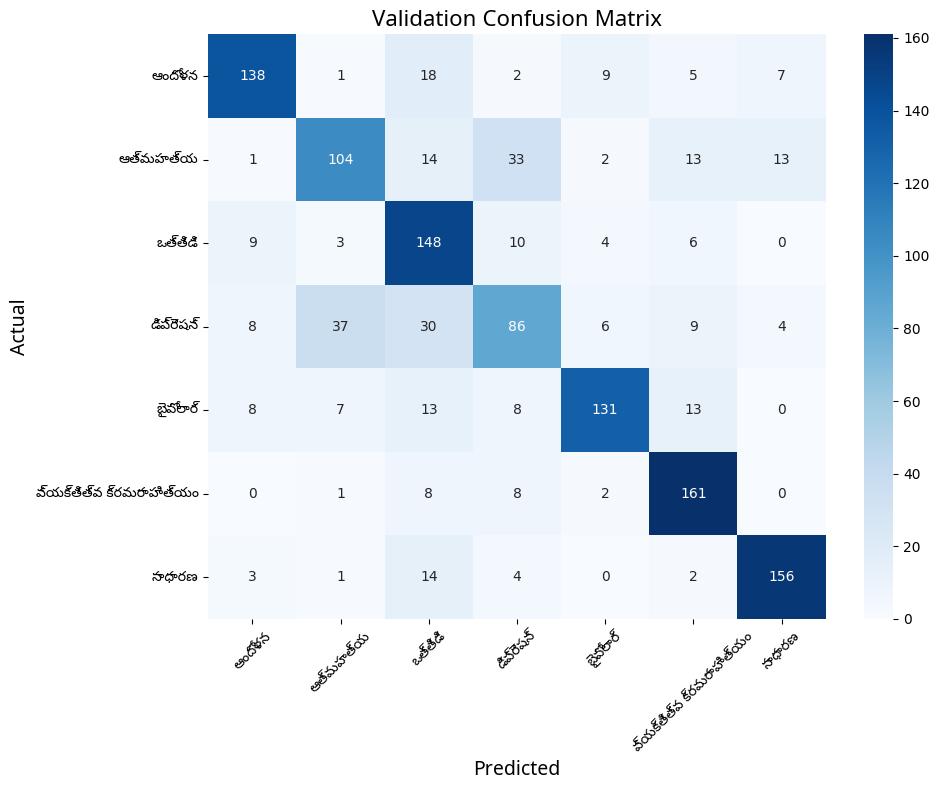


✅ Test Accuracy: 0.7325

📊 Test Classification Report:
                         precision    recall  f1-score   support

                 ఆందోళన       0.84      0.81      0.82       180
               ఆత్మహత్య       0.62      0.51      0.56       180
                ఒత్తిడి       0.61      0.81      0.70       180
              డిప్రెషన్       0.53      0.49      0.51       180
               బైపోలార్       0.88      0.74      0.80       180
వ్యక్తిత్వ క్రమరాహిత్యం       0.80      0.87      0.83       180
                 సాధారణ       0.88      0.89      0.89       180

               accuracy                           0.73      1260
              macro avg       0.74      0.73      0.73      1260
           weighted avg       0.74      0.73      0.73      1260



/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3078 (\N{TELUGU LETTER AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Telugu natively.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3074 (\N{TELUGU SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3110 (\N{TELUGU LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3147 (\N{TELUGU VOWEL SIGN OO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3123 (\N{TELUGU LETTER LLA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-p

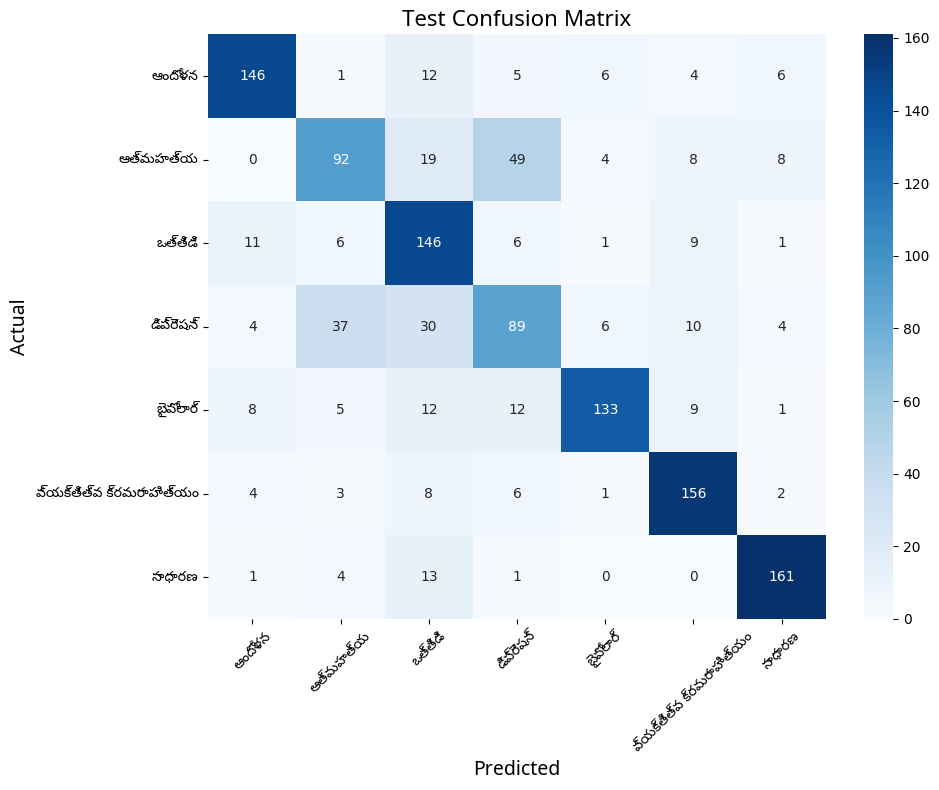

In [ ]:
# Validation Confusion Matrix
evaluate_confusion_matrix(model, val_loader, label_encoder, dataset_name="Validation")

# Test Confusion Matrix
evaluate_confusion_matrix(model, test_loader, label_encoder, dataset_name="Test")


In [ ]:
model.eval()
test_preds = []
test_labels_actual = []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        preds = torch.argmax(outputs.logits, dim=-1)
        test_preds.extend(preds.cpu().numpy())
        test_labels_actual.extend(batch["labels"].cpu().numpy())

results_df = pd.DataFrame({
    "Statement": test_texts,
    "Actual_Label": label_encoder.inverse_transform(test_labels_actual),
    "Predicted_Label": label_encoder.inverse_transform(test_preds)
})

results_df.to_csv("labse_test_predictions.csv", index=False, encoding="utf-8-sig")
print("✅ Saved predictions to 'labse_test_predictions.csv'")


✅ Saved predictions to 'labse_test_predictions.csv'


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 4: 100%|██████████| 368/368 [01:15<00:00,  4.86it/s, loss=0.475]



✅ Validation Accuracy: 0.6444

✅ Test Accuracy: 0.6405

📊 Test Classification Report:
                         precision    recall  f1-score   support

                 ఆందోళన       0.70      0.64      0.67       180
               ఆత్మహత్య       0.41      0.58      0.48       180
                ఒత్తిడి       0.56      0.66      0.60       180
              డిప్రెషన్       0.67      0.33      0.44       180
               బైపోలార్       0.71      0.73      0.72       180
వ్యక్తిత్వ క్రమరాహిత్యం       0.81      0.67      0.73       180
                 సాధారణ       0.76      0.87      0.81       180

               accuracy                           0.64      1260
              macro avg       0.66      0.64      0.64      1260
           weighted avg       0.66      0.64      0.64      1260



/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3078 (\N{TELUGU LETTER AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Telugu natively.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3074 (\N{TELUGU SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3110 (\N{TELUGU LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3147 (\N{TELUGU VOWEL SIGN OO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3123 (\N{TELUGU LETTER LLA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-p

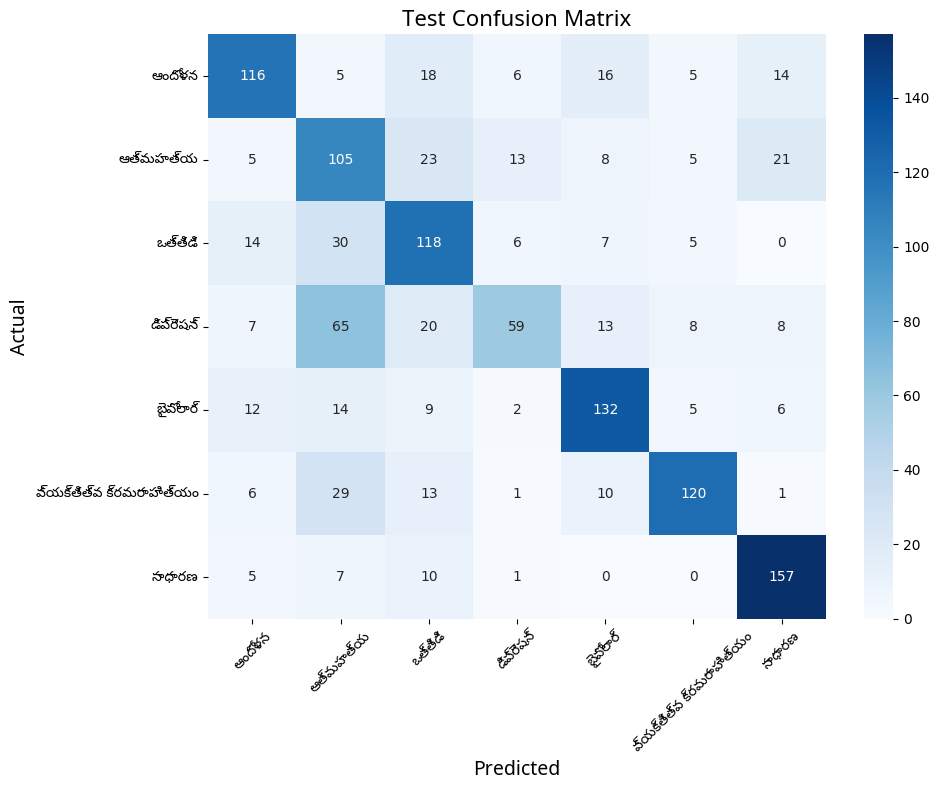

✅ Saved predictions to 'distilbert_test_predictions.csv'


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# =====================
# 🔹 Load DistilBERT (Multilingual)
# =====================
model_name = "distilbert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

num_labels = len(label_encoder.classes_)

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# =====================
# 🔹 Dataset Class
# =====================
class TeluguDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=128)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# =====================
# 🔹 Prepare Datasets & Loaders
# =====================
train_dataset = TeluguDataset(train_texts, train_labels)
val_dataset   = TeluguDataset(val_texts, val_labels)
test_dataset  = TeluguDataset(test_texts, test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16)
test_loader  = DataLoader(test_dataset, batch_size=16)

optimizer = AdamW(model.parameters(), lr=2e-5)

# =====================
# 🔹 Training Loop
# =====================
model.train()
for epoch in range(5):
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        optimizer.zero_grad()
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        loop.set_description(f"Epoch {epoch}")
        loop.set_postfix(loss=loss.item())

# =====================
# 🔹 Validation Evaluation
# =====================
def evaluate_validation_accuracy(model, dataloader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch["labels"].cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"\n✅ Validation Accuracy: {acc:.4f}")

evaluate_validation_accuracy(model, val_loader)

# =====================
# 🔹 Confusion Matrix & Classification Report
# =====================
font_path = "NotoSansTelugu-VariableFont_wdth,wght.ttf"  # Upload this to Colab
prop = fm.FontProperties(fname=font_path)

def evaluate_confusion_matrix(model, dataloader, label_encoder, dataset_name="Dataset"):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch["labels"].cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"\n✅ {dataset_name} Accuracy: {acc:.4f}")

    print(f"\n📊 {dataset_name} Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                     xticklabels=label_encoder.classes_,
                     yticklabels=label_encoder.classes_)

    ax.set_title(f"{dataset_name} Confusion Matrix", fontproperties=prop, fontsize=16)
    ax.set_xlabel("Predicted", fontproperties=prop, fontsize=14)
    ax.set_ylabel("Actual", fontproperties=prop, fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), fontproperties=prop, rotation=45)
    ax.set_yticklabels(ax.get_yticklabels(), fontproperties=prop, rotation=0)

    plt.tight_layout()
    plt.show()

# Evaluate on Test
evaluate_confusion_matrix(model, test_loader, label_encoder, "Test")

# =====================
# 🔹 Save Predictions
# =====================
model.eval()
test_preds, test_labels_actual = [], []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        preds = torch.argmax(outputs.logits, dim=-1)
        test_preds.extend(preds.cpu().numpy())
        test_labels_actual.extend(batch["labels"].cpu().numpy())

results_df = pd.DataFrame({
    "Statement": test_texts,
    "Actual_Label": label_encoder.inverse_transform(test_labels_actual),
    "Predicted_Label": label_encoder.inverse_transform(test_preds)
})

results_df.to_csv("distilbert_test_predictions.csv", index=False, encoding="utf-8-sig")
print("✅ Saved predictions to 'distilbert_test_predictions.csv'")
